In [1]:
import spacy
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
model=spacy.load('en_core_web_md') # loading pre-trained 300-dimensional word-vectors

In [3]:
gre_words=df = pd.read_excel('GRE_WORDS.xlsx') # Load the GRE words to cluster

In [4]:
gre_words['Words']

0            abound
1         amorphous
2           austere
3             belie
4        capricious
5          cerebral
6         congenial
7       conspicuous
8           cursory
9          daunting
10            deify
11         didactic
12      disseminate
13         feasible
14            flout
15      homogeneous
16          humdrum
17          insipid
18       loquacious
19     misanthropic
20         misnomer
21        negligent
22       obsequious
23          placate
24       proclivity
25          puerile
26         quixotic
27      spendthrift
28         taciturn
29             wary
           ...     
818         abreast
819        confound
820      digression
821     discrepancy
822     duplicitous
823       expedient
824       fabricate
825            glum
826       harbinger
827       intrinsic
828        largesse
829       libertine
830     malfeasance
831        manifest
832          minute
833          modish
834         nascent
835       perennial
836          pious 


In [5]:
# Initialize Embedding array of shape 848x300
num_rows=gre_words['Words'].shape[0]
num_cols=300 # word embedding size
Embeddings= np.empty((num_rows,num_cols))

In [6]:
def obtain_word_embeds(words,spacy_model, embeds):
    for i in range(words.shape[0]):
        embeds[i,:]=model(words['Words'][i]).vector.reshape(1,300)
    return embeds

In [7]:
Embeddings=obtain_word_embeds(gre_words, model, Embeddings)

In [8]:
t_SNE=manifold.TSNE()
visualize_words=t_SNE.fit_transform(Embeddings)

In [153]:
indices= np.random.choice(848,300)
vis=visualize_words[indices,:]

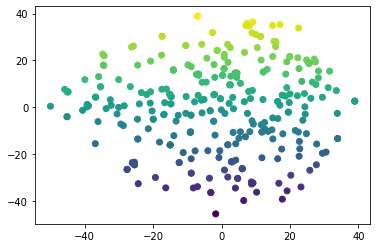

In [10]:
# before similarity clustering
ax = plt.axes()
x_data=vis[:,0]
y_data=vis[:,1]
ax.scatter(x_data, y_data, c=y_data)

In [58]:
def get_cosine_similarity(U):
    row_norm=np.linalg.norm(U,axis=1,keepdims=True)+10**-16
    U_norm= U/row_norm
    similarity_matrix= np.matmul(U_norm,U_norm.T)
    return similarity_matrix

In [152]:
similarity= get_cosine_similarity(Embeddings)

In [84]:
def get_similar_vectors(sim, thresh=0.8):
    synonyms={}
    syn_index={}
    for i in range(sim.shape[0]):
        ls=[]
        ls2=[]
        for j in range(i,sim.shape[0]):
            if(sim[i,j]>=thresh):
                ls.append(gre_words['Words'][j])
                ls2.append(j)
        synonyms[gre_words['Words'][i]]=ls
        syn_index[i]=ls2
    return synonyms, syn_index

In [151]:
syn,idx= get_similar_vectors(similarity)

In [92]:
plot_idx=[]
for x,y in idx.items():
    if len(y)<=1:
        continue
    else:
        plot_idx.append(y)

In [110]:
plot_idx_flat=list(set([e for k in plot_idx for e in k ]))
vis=visualize_words[plot_idx_flat,:]
len(plot_idx_flat)

403

In [137]:
i=0
for l in plot_idx:
    if len(l)>1:
        print("Cluster"+str(i)+":")
        print(gre_words['Words'][l])
    i+=1
    print()

Cluster0:
4      capricious
533        fickle
Name: Words, dtype: object

Cluster1:
6       congenial
544     conducive
572    salubrious
Name: Words, dtype: object

Cluster2:
10           deify
90      adulterate
105      castigate
193       canonize
317         deride
356         berate
361        subsume
386    marginalize
393     stigmatize
439       harangue
503        lionize
563         malign
593         impugn
606        upbraid
669       lambaste
680      excoriate
726     deprecate 
795      exculpate
Name: Words, dtype: object

Cluster3:
11     didactic
529    treatise
Name: Words, dtype: object

Cluster4:
13    feasible
96    amenable
Name: Words, dtype: object

Cluster5:
14          flout
341    contravene
Name: Words, dtype: object

Cluster6:
16       humdrum
285    ephemeral
389      prosaic
621      mundane
Name: Words, dtype: object

Cluster7:
17        insipid
100         banal
637         vapid
744    hodgepodge
Name: Words, dtype: object

Cluster8:
18        loquac

272    nonplussed
323     flummoxed
791     befuddled
Name: Words, dtype: object

Cluster124:
274        decry
350     denounce
458     admonish
754    repudiate
Name: Words, dtype: object

Cluster125:
275     recourse
652    equitable
Name: Words, dtype: object

Cluster126:
277    neutralize
623       nullify
Name: Words, dtype: object

Cluster127:
281     corroborate
371          debunk
616         gainsay
716    substantiate
Name: Words, dtype: object

Cluster128:
282        disparate
379    heterogeneous
405        divergent
Name: Words, dtype: object

Cluster129:
285    ephemeral
389      prosaic
621      mundane
Name: Words, dtype: object

Cluster130:
290    intimate 
319     discreet
Name: Words, dtype: object

Cluster131:
292     mitigate
615    forestall
624      obviate
Name: Words, dtype: object

Cluster132:
295    paradigmatic
735       dichotomy
789      antithesis
Name: Words, dtype: object

Cluster133:
296    pedantic
663      prolix
Name: Words, dtype: object

Cluster13

748    mercenary
763      cunning
Name: Words, dtype: object

Cluster255:
756      trifling
786    transitory
Name: Words, dtype: object

Cluster256:
764    discomfit
773     inveigle
Name: Words, dtype: object

Cluster257:
776      munificent
837    providential
Name: Words, dtype: object

Cluster258:
788     acumen
838    prowess
Name: Words, dtype: object

Cluster259:
794        evasive
822    duplicitous
Name: Words, dtype: object



,1,2,3,4,5
rapacious,avaricious,miserly,acquisitive,,
animosity,antipathy,animus,fester,enmity,
goad,foment,engender,agitate,elicit,
incontrovertible,conclusive,,,,
magnanimous,beneficent,benevolent,munificent,providential,
eccentric,whimsical,eclectic,idiosyncratic,quirky,
abhor,loathe,eschew,,,
wary,prudent,chary,circumspect,,
proclivity,propensity,,,,
obsequious,glib,officious,nonchalant,,


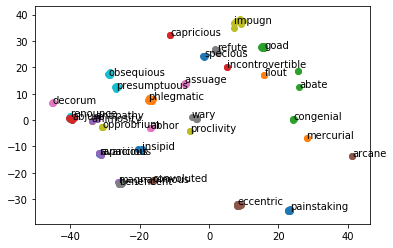

In [181]:

clust={}
good_clusters=[28,33,38,39,41,23,17,16,14,12,8,6,2,1,46,53,55,61,65,67,74,76,88,89,90,91,93,119,223,189,190,155]
axes=plt.axes()
for i in good_clusters:
    syn=plot_idx[i-1]
    vis=visualize_words[syn,:]
    axes.scatter(vis[:,0],vis[:,1])
    axes.annotate(gre_words['Words'][syn[0]],vis[0])
    #print("Cluster "+str(i)+":")
    clust[gre_words['Words'][syn[0]]]=list(gre_words["Words"][syn])
    #print(list(gre_words["Words"][syn]))
max_len=0
for x,y in clust.items():
    if len(y)>max_len:
        max_len=len(y)
for x,y in clust.items():
    if len(y)<max_len:
        for i in range(max_len-len(y)):
            y.append("")
pd.DataFrame(clust)[1:].transpose()